In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

plt.style.use('seaborn-v0_8-whitegrid')

try:
    data = pd.read_csv('data/data2.csv', sep=';', names=['discount', 'profit'])
    print("Данные успешно загружены. Количество строк:", len(data))
    display(data.head())
except FileNotFoundError:
    print("Ошибка: файл 'data/data2.csv' не найден. Убедитесь, что он находится в правильной папке.")
    data = pd.DataFrame() 

x = data['discount'].values
y = data['profit'].values

Данные успешно загружены. Количество строк: 26


,discount,profit
0,0.0,-7.697966
1,0.2,-6.572665
2,0.4,-5.370468
3,0.6,-3.158585
4,0.8,-1.482707


In [ ]:

n = len(x)
idx_quad = [0, n // 2, n - 1]
x_points_quad = x[idx_quad]
y_points_quad = y[idx_quad]

print(f"Выбранные точки для полинома 2-й степени (индексы {idx_quad}):")
for i in range(3):
    print(f"  x={x_points_quad[i]}, y={y_points_quad[i]}")


A_quad = np.vstack([x_points_quad**2, x_points_quad, np.ones(3)]).T


b_quad = y_points_quad


try:
    coeffs_quad = solve(A_quad, b_quad)
    a2, a1, a0 = coeffs_quad
    print(f"\nРешение СЛУ (коэффициенты): a₂={a2:.4f}, a₁={a1:.4f}, a₀={a0:.4f}")
except np.linalg.LinAlgError:
    print("\nОшибка: не удалось решить СЛУ. Возможно, матрица вырождена.")
    coeffs_quad = np.array([0,0,0])

Выбранные точки для полинома 2-й степени (индексы [0, 13, 25]):
  x=0.0, y=-7.697965818
  x=2.6, y=17.26743396
  x=5.0, y=25.23920411

Решение СЛУ (коэффициенты): a₂=-1.2561, a₁=12.8679, a₀=-7.6980


In [ ]:

def poly_2_func(x, coeffs):
    return coeffs[0] * x**2 + coeffs[1] * x + coeffs[2]


y_pred_quad = poly_2_func(x, coeffs_quad)

In [ ]:

rss_quad = np.sum((y - y_pred_quad)**2)

print(f"Квадратичное отклонение (RSS) для полинома 2-й степени: {rss_quad:.4f}")

Квадратичное отклонение (RSS) для полинома 2-й степени: 163.3635


In [ ]:

idx_cubic = np.linspace(0, n - 1, 4, dtype=int)
x_points_cubic = x[idx_cubic]
y_points_cubic = y[idx_cubic]

print(f"Выбранные точки для полинома 3-й степени (индексы {idx_cubic}):")
for i in range(4):
    print(f"  x={x_points_cubic[i]}, y={y_points_cubic[i]}")


A_cubic = np.vstack([x_points_cubic**3, x_points_cubic**2, x_points_cubic, np.ones(4)]).T
b_cubic = y_points_cubic


try:
    coeffs_cubic = solve(A_cubic, b_cubic)
    a3, a2, a1, a0 = coeffs_cubic
    print(f"\nРешение СЛУ (коэффициенты): a₃={a3:.4f}, a₂={a2:.4f}, a₁={a1:.4f}, a₀={a0:.4f}")
except np.linalg.LinAlgError:
    print("\nОшибка: не удалось решить СЛУ.")
    coeffs_cubic = np.array([0,0,0,0])


def poly_3_func(x, coeffs):
    return coeffs[0] * x**3 + coeffs[1] * x**2 + coeffs[2] * x + coeffs[3]

y_pred_cubic = poly_3_func(x, coeffs_cubic)


rss_cubic = np.sum((y - y_pred_cubic)**2)
print(f"Квадратичное отклонение (RSS) для полинома 3-й степени: {rss_cubic:.4f}")

Выбранные точки для полинома 3-й степени (индексы [ 0  8 16 25]):
  x=0.0, y=-7.697965818
  x=1.6, y=6.327902394
  x=3.2, y=23.04006768
  x=5.0, y=25.23920411

Решение СЛУ (коэффициенты): a₃=-0.6475, a₂=3.6326, a₁=4.6116, a₀=-7.6980
Квадратичное отклонение (RSS) для полинома 3-й степени: 3.3534


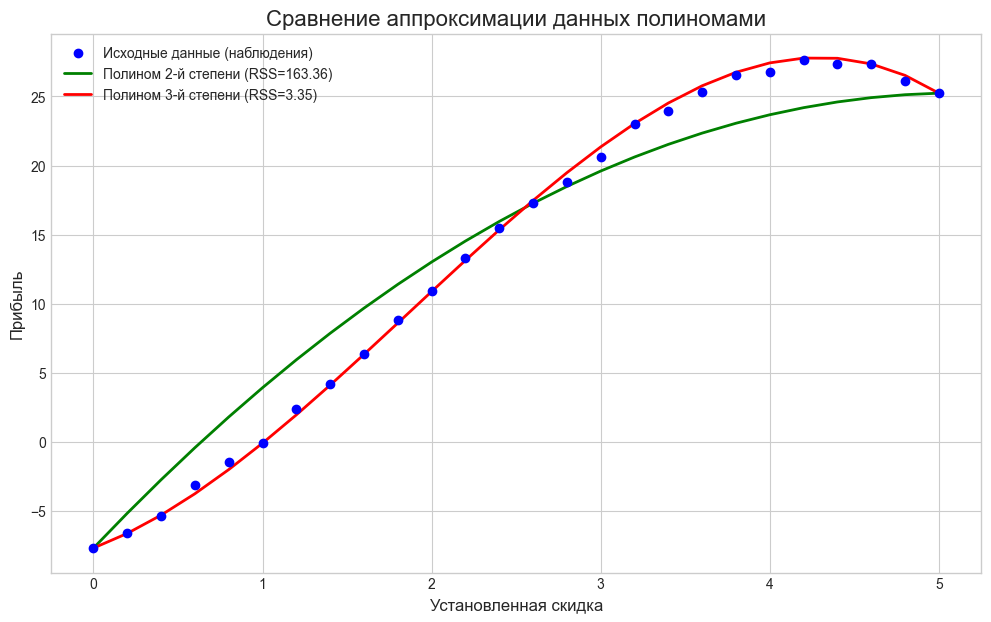

In [ ]:
plt.figure(figsize=(12, 7))


plt.scatter(x, y, label='Исходные данные (наблюдения)', color='blue', zorder=5)


plt.plot(x, y_pred_quad, label=f'Полином 2-й степени (RSS={rss_quad:.2f})', color='green', linewidth=2)


plt.plot(x, y_pred_cubic, label=f'Полином 3-й степени (RSS={rss_cubic:.2f})', color='red', linewidth=2)

plt.title('Сравнение аппроксимации данных полиномами', fontsize=16)
plt.xlabel('Установленная скидка', fontsize=12)
plt.ylabel('Прибыль', fontsize=12)
plt.legend()
plt.show()

In [ ]:

print("\n--- Выбор лучшей модели и прогноз ---")
if rss_cubic < rss_quad:
    print(f"Модель с полиномом 3-й степени лучше (RSS={rss_cubic:.4f} < {rss_quad:.4f}).")
    best_model_func = poly_3_func
    best_coeffs = coeffs_cubic
    model_name = "кубической"
else:
    print(f"Модель с полиномом 2-й степени лучше (RSS={rss_quad:.4f} <= {rss_cubic:.4f}).")
    best_model_func = poly_2_func
    best_coeffs = coeffs_quad
    model_name = "квадратичной"


discount_to_predict = np.array([0.06, 0.08])
predicted_profit = best_model_func(discount_to_predict, best_coeffs)

print(f"\nПрогноз прибыли по лучшей ({model_name}) модели:")
print(f"  - При скидке 6% (x=0.06): ожидаемая прибыль составит {predicted_profit[0]:.4f}")
print(f"  - При скидке 8% (x=0.08): ожидаемая прибыль составит {predicted_profit[1]:.4f}")


--- Выбор лучшей модели и прогноз ---
Модель с полиномом 3-й степени лучше (RSS=3.3534 < 163.3635).

Прогноз прибыли по лучшей (кубической) модели:
  - При скидке 6% (x=0.06): ожидаемая прибыль составит -7.4083
  - При скидке 8% (x=0.08): ожидаемая прибыль составит -7.3061
